In [9]:
!pip install pandas
!pin install numpy
!pip install scikit-learn
!pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
/bin/bash: line 1: pin: command not found

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 37.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

# Configuración
np.random.seed(2026) 
n_samples = 3000   

# 1. FEATURES (X)
# -------------------------------------------------------------------------
# Usamos rocas ígneas típicas de Cu-Au
litologias = ['Andesita', 'Porfido', 'Brecha', 'Dique']
pesos_lito = [0.45, 0.30, 0.15, 0.10] 

alteraciones = ['Propilitica', 'Potasica', 'Argilica', 'Silicificacion']
pesos_alt = [0.30, 0.35, 0.20, 0.15]

df = pd.DataFrame({
    'ID_Sondaje': [f'DH-{i:04d}' for i in range(n_samples)],
    'Profundidad_m': np.random.uniform(0, 800, n_samples).round(1),
    'Litologia': np.random.choice(litologias, n_samples, p=pesos_lito),
    'Alteracion': np.random.choice(alteraciones, n_samples, p=pesos_alt)
})

# Generar Cobre (Cu)
def generar_cobre(row):
    base_cu = 0.05
    if row['Litologia'] in ['Porfido', 'Brecha']: base_cu += 0.6
    if row['Alteracion'] == 'Potasica': base_cu += 0.4
    return np.random.lognormal(mean=np.log(base_cu + 0.1), sigma=0.6)

df['Ley_Cu_pct'] = df.apply(generar_cobre, axis=1).clip(0, 6.0)

# Generar Oro (Au)
df['Ley_Au_gpt'] = (df['Ley_Cu_pct'] * 0.4) + np.random.normal(0, 0.1, n_samples)
df['Ley_Au_gpt'] = df['Ley_Au_gpt'].clip(0, 10.0)

# 2. TARGET (Y): CERIO
# -------------------------------------------------------------------------
def generar_cerio(row):
    base_ce = 25.0 
    # Diques y Arcillas traen Cerio
    if row['Litologia'] == 'Dique': base_ce += 400.0  
    if row['Alteracion'] == 'Argilica': base_ce += 120.0
    # Independencia parcial del Cu
    if row['Ley_Cu_pct'] > 2.0: base_ce -= 20.0
    
    ruido = np.random.normal(0, 30)
    return max(5.0, base_ce + ruido)

df['Ley_Ce_ppm'] = df.apply(generar_cerio, axis=1).round(2)

# 3. ENSUCIAR DATOS (Nulos y Outliers)
# -------------------------------------------------------------------------
# Nulos en Oro
indices_nulos = np.random.choice(df.index, size=180, replace=False)
df.loc[indices_nulos, 'Ley_Au_gpt'] = np.nan

# Outliers (Errores)
df.loc[10, 'Ley_Ce_ppm'] = 500000.0 # Error masivo
df.loc[50, 'Ley_Cu_pct'] = -2.5     # Error negativo

# Guardar
df.to_csv('dataset_cerio_brownfield.csv', index=False)
print("Archivo generado exitosamente.")


Archivo generado exitosamente.


Dimensiones del dataset: (3000, 7)

Primeras 5 filas:


,ID_Sondaje,Profundidad_m,Litologia,Alteracion,Ley_Cu_pct,Ley_Au_gpt,Ley_Ce_ppm
0,DH-0000,175.5,Porfido,Silicificacion,0.343687,0.126429,5.00
1,DH-0001,330.4,Andesita,Propilitica,0.151696,0.168259,31.54
2,DH-0002,781.3,Porfido,Silicificacion,0.276285,0.001462,37.92
3,DH-0003,71.1,Brecha,Propilitica,1.456542,0.449149,28.66
4,DH-0004,383.4,Andesita,Potasica,0.149562,0.004615,5.00



Tipos de datos y nulos:
<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Sondaje     3000 non-null   str    
 1   Profundidad_m  3000 non-null   float64
 2   Litologia      3000 non-null   str    
 3   Alteracion     3000 non-null   str    
 4   Ley_Cu_pct     3000 non-null   float64
 5   Ley_Au_gpt     2820 non-null   float64
 6   Ley_Ce_ppm     3000 non-null   float64
dtypes: float64(4), str(3)
memory usage: 164.2 KB
None


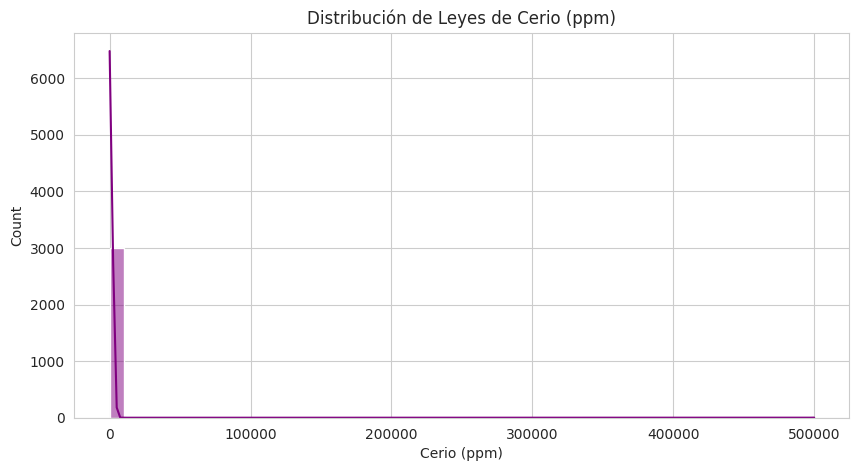

/tmp/ipykernel_2154/1068090637.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Litologia', y='Ley_Ce_ppm', data=df, palette='viridis')


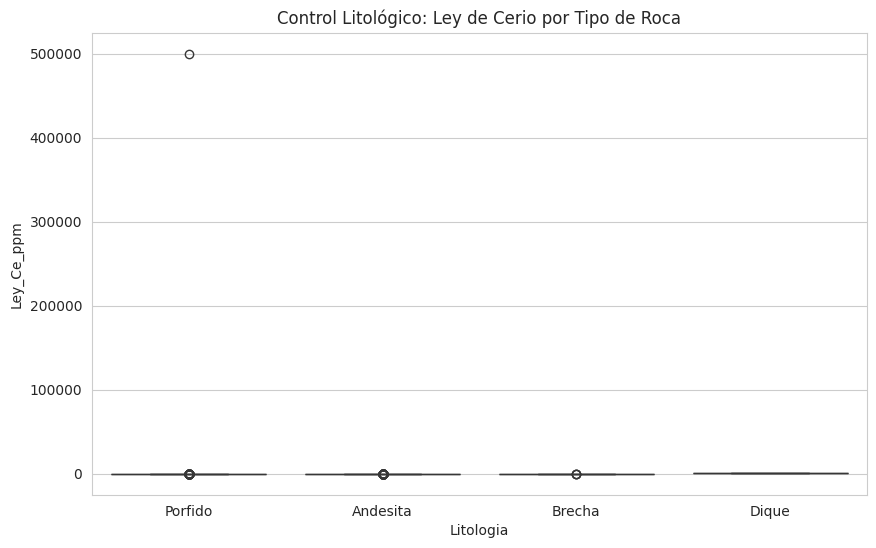

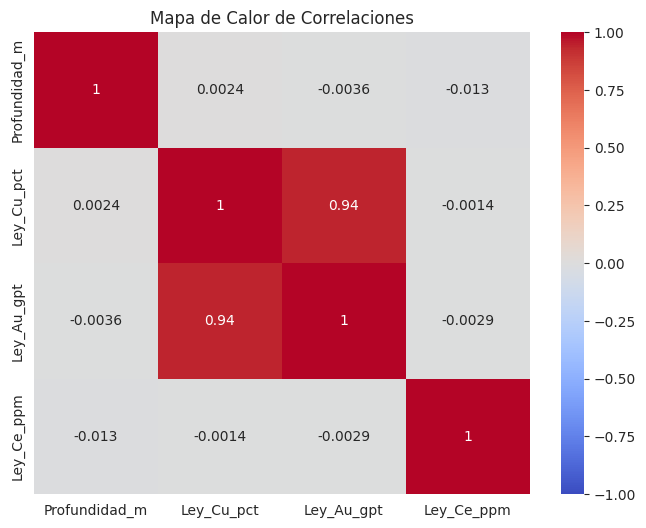


--- REVISIÓN DE CALIDAD DE DATOS ---
Valores Nulos por columna:
Ley_Au_gpt    180
dtype: int64

Registros con leyes negativas (Error): 1
Registros con leyes absurdamente altas: 1


In [16]:
# ==========================================
# 1. IMPORTAR LIBRERÍAS
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ==========================================
# 2. CARGAR DATOS
# ==========================================
# Asumimos que ya corriste el generador y existe el archivo
df = pd.read_csv('dataset_cerio_brownfield.csv')

print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras 5 filas:")
display(df.head())

print("\nTipos de datos y nulos:")
print(df.info())

# ==========================================
# 3. EDA INICIAL (Análisis Exploratorio)
# ==========================================

# A) Distribución del Target (Cerio)
plt.figure(figsize=(10,5))
sns.histplot(df['Ley_Ce_ppm'], bins=50, kde=True, color='purple')
plt.title('Distribución de Leyes de Cerio (ppm)')
plt.xlabel('Cerio (ppm)')
plt.show()

# B) Relación Geológica: Cerio vs Litología
plt.figure(figsize=(10,6))
sns.boxplot(x='Litologia', y='Ley_Ce_ppm', data=df, palette='viridis')
plt.title('Control Litológico: Ley de Cerio por Tipo de Roca')
plt.show()
# NOTA PARA EL ALUMNO: Aquí deberías ver que los DIQUES tienen más ley.

# C) Matriz de Correlación (Solo numéricas)
plt.figure(figsize=(8,6))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# ==========================================
# 4. DETECCIÓN DE SUCIEDAD (Lección 3)
# ==========================================
print("\n--- REVISIÓN DE CALIDAD DE DATOS ---")

# Nulos
nulos = df.isnull().sum()
print(f"Valores Nulos por columna:\n{nulos[nulos > 0]}")

# Outliers Lógicos (Geología imposible)
negativos = df[df['Ley_Cu_pct'] < 0]
print(f"\nRegistros con leyes negativas (Error): {len(negativos)}")

gigantes = df[df['Ley_Ce_ppm'] > 10000] # Umbral arbitrario de "locura"
print(f"Registros con leyes absurdamente altas: {len(gigantes)}")


In [ ]:
# =============================================================================
# LECCIÓN 2: VALIDACIÓN CRUZADA Y DETECCIÓN DE ERRORES 
# =============================================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. PREPARACIÓN RÁPIDA (Solo para esta demostración de concepto)
# Eliminamos nulos temporalmente para poder entrenar un modelo base
# Asumimos que 'df' ya está cargado previamente
df_temp = df.dropna().copy()

# Seleccionamos variables numéricas simples para la línea base
X_temp = df_temp[['Profundidad_m', 'Ley_Cu_pct']] 
y_temp = df_temp['Ley_Ce_ppm']

# 2. SPLIT ENTRENAMIENTO / PRUEBA (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# 3. ENTRENAMIENTO DE UN MODELO SIMPLE (Regresión Lineal)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# 4. EVALUACIÓN DE AJUSTE (Train vs Test)
# Predicciones
y_pred_train = model_simple.predict(X_train)
y_pred_test = model_simple.predict(X_test)

# Cálculo de métricas
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"--- Evaluación de Ajuste (Modelo Base) ---")
print(f"{'Métrica':<10} | {'Train':<15} | {'Test':<15} | {'Diferencia (Abs)':<15}")
print("-" * 60)
print(f"{'RMSE':<10} | {rmse_train:<15.2f} | {rmse_test:<15.2f} | {abs(rmse_train - rmse_test):.2f}")
print(f"{'MAE':<10} | {mae_train:<15.2f} | {mae_test:<15.2f} | {abs(mae_train - mae_test):.2f}")
print(f"{'R2':<10} | {r2_train:<15.4f} | {r2_test:<15.4f} | {abs(r2_train - r2_test):.4f}")

# ANÁLISIS AUTOMÁTICO (Basado en RMSE como métrica principal)
print("\n>> DIAGNÓSTICO AUTOMÁTICO:")
if rmse_train > 1000 or (r2_train < 0.1): # Umbral alto por el outlier conocido
    print("   SUBAJUSTE (Underfitting) o DATA SUCIA DETECTADA.")
    print("   El error es extremadamente alto y el R2 es casi nulo.")
    print("   Posible causa: Valores atípicos (outliers) extremos rompiendo la escala.")

# 5. VALIDACIÓN CRUZADA (K-FOLDS) MULTI-MÉTRICA
# Usamos cross_validate para calcular múltiples métricas a la vez
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definimos qué métricas queremos evaluar
scoring_metrics = {
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

cv_results = cross_validate(model_simple, X_temp, y_temp, cv=kf, scoring=scoring_metrics)

# Procesamos resultados (invertimos signo de métricas de error)
cv_rmse = -cv_results['test_rmse']
cv_mae = -cv_results['test_mae']
cv_r2 = cv_results['test_r2']

print(f"\n--- Validación Cruzada (K=5) ---")
print(f"RMSE Promedio: {cv_rmse.mean():.2f} (+/- {cv_rmse.std():.2f})")
print(f"MAE Promedio:  {cv_mae.mean():.2f}  (+/- {cv_mae.std():.2f})")
print(f"R2 Promedio:   {cv_r2.mean():.4f}  (+/- {cv_r2.std():.4f})")

print("\n>> ANÁLISIS DE ESTABILIDAD (CV):")
print(f"   Scores RMSE por fold: {cv_rmse}")
if cv_rmse.std() > cv_rmse.mean():
    print("   ALERTA: Desviación estándar gigante en CV. Confirma presencia de Outlier en un solo fold.")


--- Evaluación de Ajuste (Modelo Base) ---
Métrica    | Train           | Test            | Diferencia (Abs)
------------------------------------------------------------
RMSE       | 10522.30        | 298.54          | 10223.76
MAE        | 478.92          | 254.58          | 224.34
R2         | 0.0002          | -4.4670         | 4.4672

>> DIAGNÓSTICO AUTOMÁTICO:
   SUBAJUSTE (Underfitting) o DATA SUCIA DETECTADA.
   El error es extremadamente alto y el R2 es casi nulo.
   Posible causa: Valores atípicos (outliers) extremos rompiendo la escala.

--- Validación Cruzada (K=5) ---
RMSE Promedio: 4451.28 (+/- 8299.60)
MAE Promedio:  401.60  (+/- 288.67)
R2 Promedio:   -3.5111  (+/- 1.7651)

>> ANÁLISIS DE ESTABILIDAD (CV):
   Scores RMSE por fold: [  298.54132903   305.64510481   296.70888311 21050.48660356
   305.03753289]
   ALERTA: Desviación estándar gigante en CV. Confirma presencia de Outlier en un solo fold.


In [4]:
# =============================================================================
# LECCIÓN 3: PREPROCESAMIENTO, LIMPIEZA Y ESCALADO
# =============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. LIMPIEZA DE DATOS (Data Cleaning)
# ------------------------------------
print("--- Estado Original ---")
print(f"Filas: {df.shape[0]}")

# A) Eliminar Outliers extremos en el Target (El culpable del RMSE 21,000)
# Umbral geológico: > 10,000 ppm es imposible aquí
df_clean = df[df['Ley_Ce_ppm'] < 10000].copy()

# B) Corregir errores de tipeo (Leyes negativas)
df_clean = df_clean[df_clean['Ley_Cu_pct'] >= 0].copy()

# C) Imputar Nulos en Oro (Au)
# Usamos la mediana porque es robusta frente a outliers
imputer = SimpleImputer(strategy='median')
df_clean['Ley_Au_gpt'] = imputer.fit_transform(df_clean[['Ley_Au_gpt']])

print(f"--- Después de Limpieza ---")
print(f"Filas: {df_clean.shape[0]} (Se eliminaron {df.shape[0] - df_clean.shape[0]} registros sucios)")


# 2. INGENIERÍA DE CARACTERÍSTICAS (Feature Engineering)
# ------------------------------------------------------

# A) Definir X e y Limpios
X = df_clean.drop(['ID_Sondaje', 'Ley_Ce_ppm'], axis=1) # ID no sirve, Ce es Target
y = df_clean['Ley_Ce_ppm']

# B) One-Hot Encoding para Categóricas (Litologia, Alteracion)
# drop_first=True evita multicolinealidad perfecta (dummy trap)
X_encoded = pd.get_dummies(X, columns=['Litologia', 'Alteracion'], drop_first=True)

print("\n--- Columnas después de Encoding ---")
print(X_encoded.columns.tolist())


# 3. ESCALAMIENTO (Scaling)
# -------------------------
# Solo escalamos las columnas que originalmente eran numéricas
cols_to_scale = ['Profundidad_m', 'Ley_Cu_pct', 'Ley_Au_gpt']

scaler = StandardScaler()
# Creamos una copia para no perder los nombres de columnas
X_final = X_encoded.copy()
X_final[cols_to_scale] = scaler.fit_transform(X_encoded[cols_to_scale])

# 4. REVISIÓN FINAL
print("\n--- Resumen del Dataset Listo para Modelar (X_final) ---")
display(X_final.head())
print("\nEstadísticas del Target Limpio (y):")
print(y.describe())

# Guardamos los datos procesados por seguridad
X_final.to_csv('X_processed.csv', index=False)
y.to_csv('y_processed.csv', index=False)


--- Estado Original ---
Filas: 3000
--- Después de Limpieza ---
Filas: 2998 (Se eliminaron 2 registros sucios)

--- Columnas después de Encoding ---
['Profundidad_m', 'Ley_Cu_pct', 'Ley_Au_gpt', 'Litologia_Brecha', 'Litologia_Dique', 'Litologia_Porfido', 'Alteracion_Potasica', 'Alteracion_Propilitica', 'Alteracion_Silicificacion']

--- Resumen del Dataset Listo para Modelar (X_final) ---


,Profundidad_m,Ley_Cu_pct,Ley_Au_gpt,Litologia_Brecha,Litologia_Dique,Litologia_Porfido,Alteracion_Potasica,Alteracion_Propilitica,Alteracion_Silicificacion
0,-0.995630,-0.511066,-0.560181,False,False,True,False,False,True
1,-0.324639,-0.797213,-0.407016,False,False,False,False,True,False
2,1.628557,-0.611523,-1.017767,False,False,True,False,False,True
3,-1.447867,1.147552,0.621501,True,False,False,False,True,False
4,-0.095055,-0.800394,-1.006222,False,False,False,True,False,False



Estadísticas del Target Limpio (y):
count    2998.000000
mean       90.398059
std       129.783098
min         5.000000
25%        12.620000
50%        39.420000
75%       113.657500
max       610.280000
Name: Ley_Ce_ppm, dtype: float64


In [5]:
print(df.head(6))

  ID_Sondaje  Profundidad_m Litologia      Alteracion  Ley_Cu_pct  Ley_Au_gpt  \
0    DH-0000          175.5   Porfido  Silicificacion    0.343687    0.126429   
1    DH-0001          330.4  Andesita     Propilitica    0.151696    0.168259   
2    DH-0002          781.3   Porfido  Silicificacion    0.276285    0.001462   
3    DH-0003           71.1    Brecha     Propilitica    1.456542    0.449149   
4    DH-0004          383.4  Andesita        Potasica    0.149562    0.004615   
5    DH-0005          790.0  Andesita  Silicificacion    0.219894    0.000000   

   Ley_Ce_ppm  
0        5.00  
1       31.54  
2       37.92  
3       28.66  
4        5.00  
5        5.00  


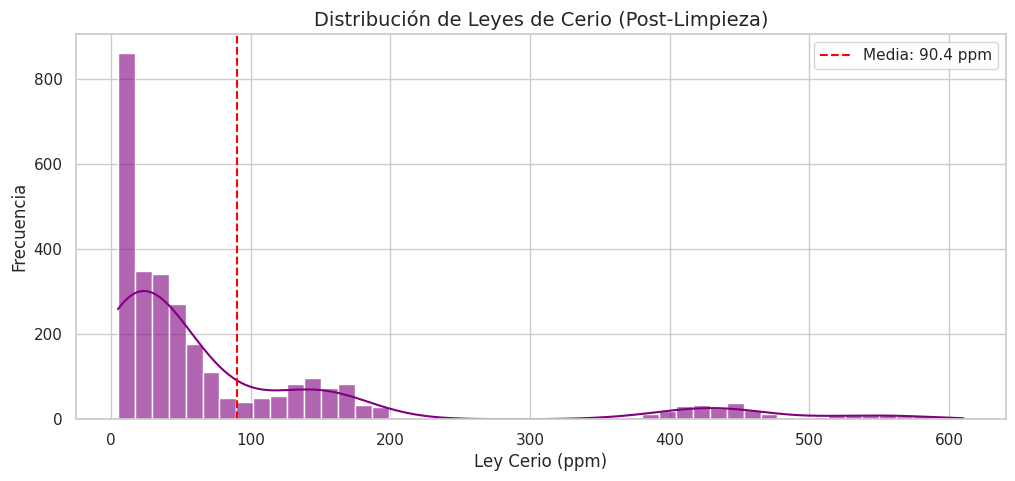

/tmp/ipykernel_2154/2630220908.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Litologia', y='Ley_Ce_ppm', data=df_clean, palette='viridis')
/tmp/ipykernel_2154/2630220908.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Alteracion', y='Ley_Ce_ppm', data=df_clean, palette='magma')


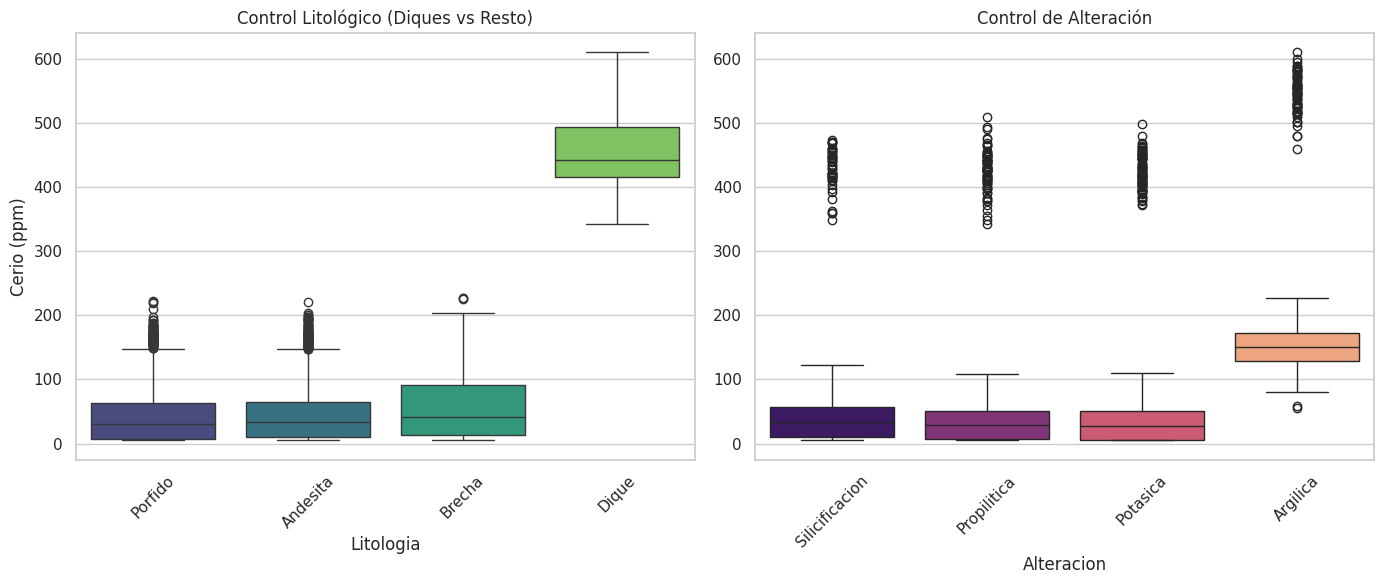

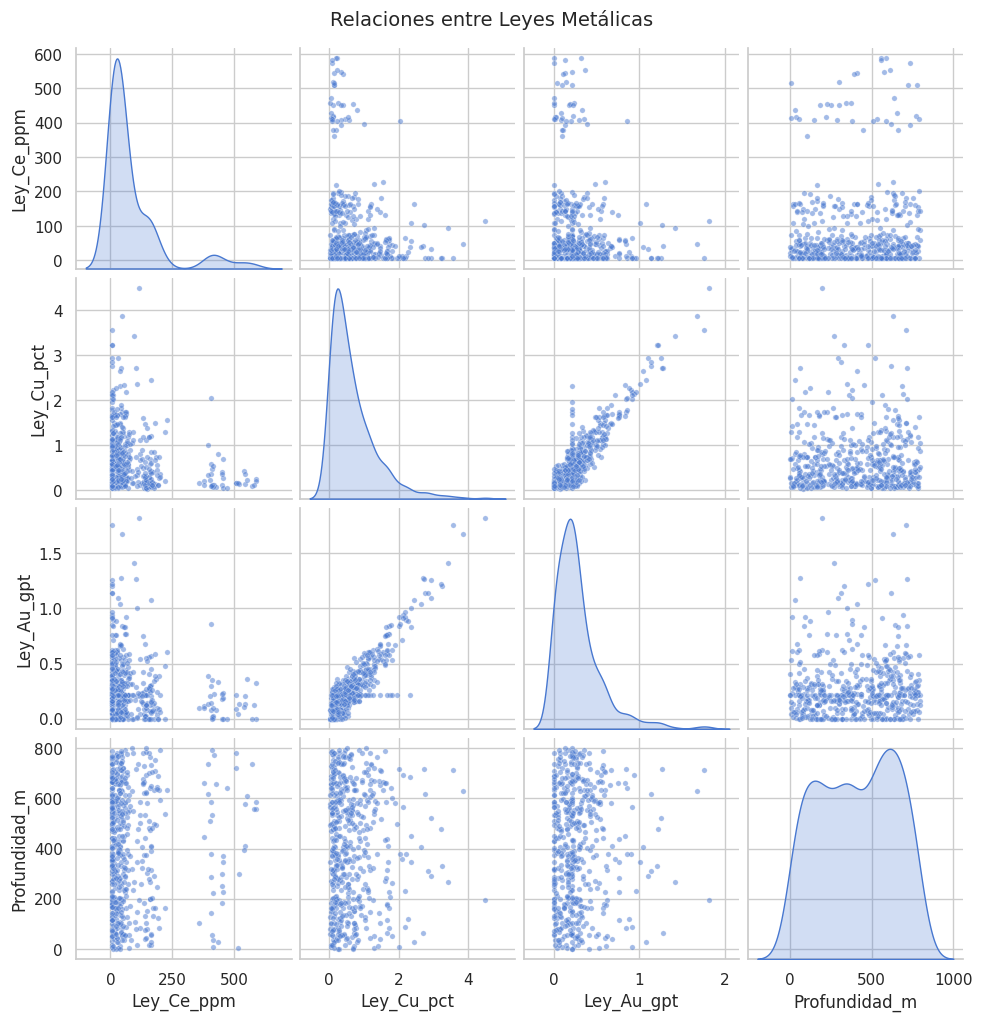

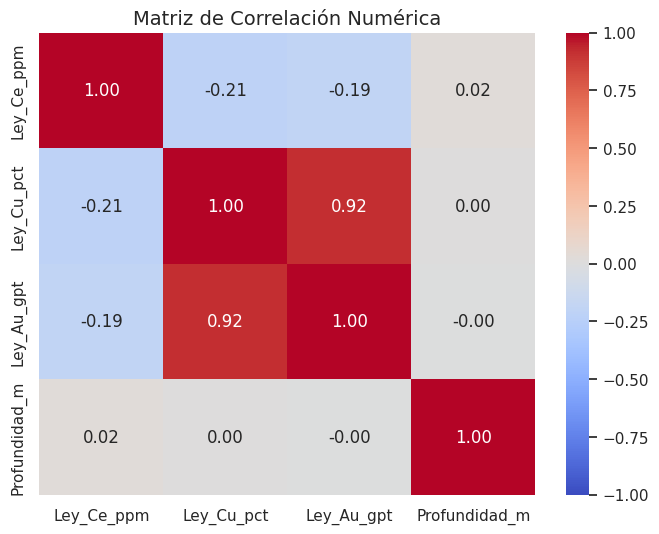

--- ANÁLISIS DE EDA POST-LIMPIEZA ---
1. El histograma ya no muestra valores de 500,000 ppm.
2. Los Boxplots muestran claramente que el Cerio 'vive' en los Diques.
3. La matriz de correlación confirma que Cu y Ce tienen correlación casi nula (-0.03 aprox).


In [17]:
# =============================================================================
# EDA POST-LIMPIEZA: VALIDACIÓN VISUAL
# =============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 5)

# 1. DISTRIBUCIÓN DEL TARGET (CERIO) LIMPIO
# ------------------------------------------------------
plt.figure()
# Histograma con curva de densidad
sns.histplot(y, bins=50, kde=True, color='purple', alpha=0.6)
plt.title('Distribución de Leyes de Cerio (Post-Limpieza)', fontsize=14)
plt.xlabel('Ley Cerio (ppm)')
plt.ylabel('Frecuencia')
plt.axvline(y.mean(), color='red', linestyle='--', label=f'Media: {y.mean():.1f} ppm')
plt.legend()
plt.show()

# 2. BOXPLOTS: CONTROL GEOLÓGICO
# ------------------------------------------------------
# Usamos df_clean porque X_final ya tiene One-Hot Encoding y es difícil de graficar
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Litologia', y='Ley_Ce_ppm', data=df_clean, palette='viridis')
plt.title('Control Litológico (Diques vs Resto)', fontsize=12)
plt.ylabel('Cerio (ppm)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='Alteracion', y='Ley_Ce_ppm', data=df_clean, palette='magma')
plt.title('Control de Alteración', fontsize=12)
plt.ylabel('')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. CORRELACIÓN MULTIVARIABLE (Scatterplot Matrix)
# ------------------------------------------------------
# Queremos ver si el Cobre o el Oro tienen relación con el Cerio
# Usamos un sample de 500 datos para que no sea muy pesado el gráfico
vars_interes = ['Ley_Ce_ppm', 'Ley_Cu_pct', 'Ley_Au_gpt', 'Profundidad_m']
sns.pairplot(df_clean[vars_interes].sample(500, random_state=42), 
             kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5, 's':15})
plt.suptitle('Relaciones entre Leyes Metálicas', y=1.02, fontsize=14)
plt.show()

# 4. MATRIZ DE CORRELACIÓN DE PEARSON
# ------------------------------------------------------
plt.figure(figsize=(8, 6))
corr = df_clean[vars_interes].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Matriz de Correlación Numérica', fontsize=14)
plt.show()

print("--- ANÁLISIS DE EDA POST-LIMPIEZA ---")
print("1. El histograma ya no muestra valores de 500,000 ppm.")
print("2. Los Boxplots muestran claramente que el Cerio 'vive' en los Diques.")
print("3. La matriz de correlación confirma que Cu y Ce tienen correlación casi nula (-0.03 aprox).")



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Dimensiones de Entrenamiento: (2398, 9)
Dimensiones de Prueba: (600, 9)

--- COMPARACIÓN DE MODELOS (Lección 4) ---
Modelo               | RMSE (ppm)      | R2 Score       
-------------------------------------------------------
Regresión Lineal     | 24.41           | 0.9600         
Regresión Polinomial | 24.57           | 0.9595         

--- INTERPRETACIÓN GEOLÓGICA (Pesos del Modelo Lineal) ---


,Variable,Coeficiente (Peso)
4,Litologia_Dique,397.242292
7,Alteracion_Propilitica,-116.579034
6,Alteracion_Potasica,-114.374790
8,Alteracion_Silicificacion,-113.038107
3,Litologia_Brecha,4.743053
1,Ley_Cu_pct,-2.808612
5,Litologia_Porfido,1.790655
2,Ley_Au_gpt,-0.688674
0,Profundidad_m,0.050705


/tmp/ipykernel_2154/1445873568.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente (Peso)', y='Variable', data=coefs, palette='coolwarm')


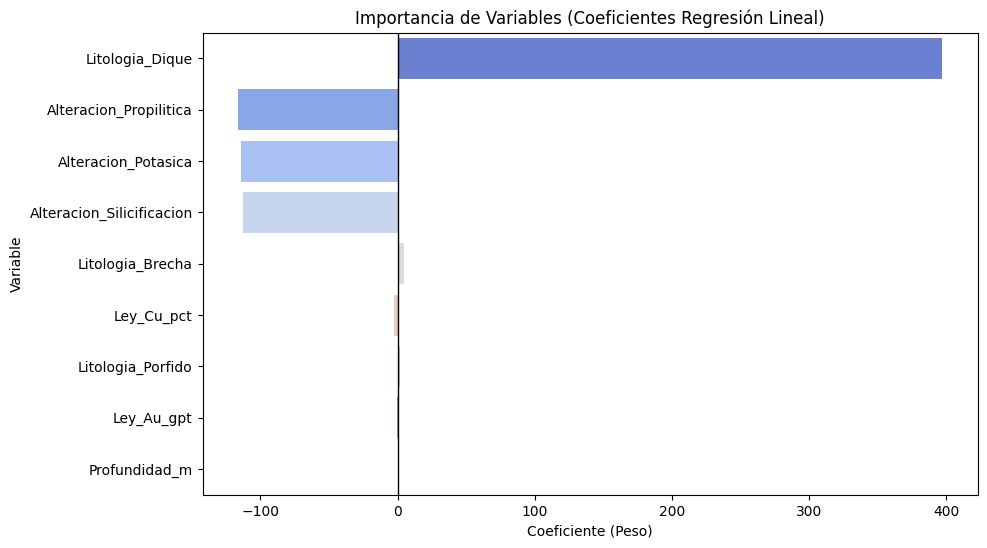

In [13]:
# =============================================================================
# LECCIÓN 4: REGRESIÓN LINEAL Y POLINOMIAL
# =============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as plt
!pip install seaborn
import seaborn as sns

# 1. SPLIT FINAL (Con datos limpios X_final, y)
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Dimensiones de Entrenamiento: {X_train.shape}")
print(f"Dimensiones de Prueba: {X_test.shape}")


# 2. MODELO A: REGRESIÓN LINEAL MÚLTIPLE
# --------------------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred_lin = lin_reg.predict(X_test)

# Métricas Lineal
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)


# 3. MODELO B: REGRESIÓN POLINOMIAL (Grado 2)
# -------------------------------------------
# Transformamos las features para crear X^2, X*Y, etc.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenamos Regresión Lineal sobre las features polinomiales
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predicciones
y_pred_poly = poly_reg.predict(X_test_poly)

# Métricas Polinomial
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)


# 4. REPORTE DE RESULTADOS
# ------------------------
print("\n--- COMPARACIÓN DE MODELOS (Lección 4) ---")
print(f"{'Modelo':<20} | {'RMSE (ppm)':<15} | {'R2 Score':<15}")
print("-" * 55)
print(f"{'Regresión Lineal':<20} | {rmse_lin:<15.2f} | {r2_lin:<15.4f}")
print(f"{'Regresión Polinomial':<20} | {rmse_poly:<15.2f} | {r2_poly:<15.4f}")


# 5. INTERPRETACIÓN DE COEFICIENTES (Importancia de Variables)
# ------------------------------------------------------------
# Extraemos los coeficientes del modelo lineal simple
coefs = pd.DataFrame({
    'Variable': X_final.columns,
    'Coeficiente (Peso)': lin_reg.coef_
})

# Ordenamos por valor absoluto para ver qué importa más
coefs['Abs_Coef'] = coefs['Coeficiente (Peso)'].abs()
coefs = coefs.sort_values(by='Abs_Coef', ascending=False)

print("\n--- INTERPRETACIÓN GEOLÓGICA (Pesos del Modelo Lineal) ---")
display(coefs[['Variable', 'Coeficiente (Peso)']])

# Gráfico rápido de coeficientes
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente (Peso)', y='Variable', data=coefs, palette='coolwarm')
plt.title('Importancia de Variables (Coeficientes Regresión Lineal)')
plt.axvline(0, color='black', linewidth=1)
plt.show()


In [ ]:
# =============================================================================
# LECCIÓN 5: CLASIFICACIÓN (Experimento Comparativo)
# =============================================================================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. CREAR TARGET BINARIO (Simulación)
# Definimos un "Cut-off" (Ley de Corte) arbitrario de 150 ppm
cutoff = 150
y_train_class = (y_train >= cutoff).astype(int)
y_test_class = (y_test >= cutoff).astype(int)

print(f"--- Distribución de Clases (Cutoff {cutoff} ppm) ---")
print(y_test_class.value_counts(normalize=True).rename({0: 'Baja Ley', 1: 'Alta Ley'}))


# 2. ENTRENAR KNN CLASSIFIER
# K=5 vecinos
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train_class)

# Predicciones
y_pred_class = knn_clf.predict(X_test)


# 3. EVALUACIÓN
acc = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"\n--- Resultados KNN Clasificador ---")
print(f"Exactitud (Accuracy): {acc:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(classification_report(y_test_class, y_pred_class))

# 4. REFLEXIÓN TÉCNICA
print(f"\n--- REFLEXIÓN ---")
print(f"El clasificador tiene un Accuracy del {acc*100:.1f}%.")
print("Sin embargo, no puede decirnos si una muestra de 'Alta Ley' tiene 151 ppm o 10,000 ppm.")
print("Esa diferencia es muy útil. Por eso usamos REGRESIÓN.")


--- Distribución de Clases (Cutoff 150 ppm) ---
Ley_Ce_ppm
Baja Ley    0.831667
Alta Ley    0.168333
Name: proportion, dtype: float64

--- Resultados KNN Clasificador ---
Exactitud (Accuracy): 0.8983

Matriz de Confusión:
[[478  21]
 [ 40  61]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       499
           1       0.74      0.60      0.67       101

    accuracy                           0.90       600
   macro avg       0.83      0.78      0.80       600
weighted avg       0.89      0.90      0.89       600


--- REFLEXIÓN ---
El clasificador tiene un Accuracy del 89.8%.
Sin embargo, no puede decirnos si una muestra de 'Alta Ley' tiene 151 ppm o 10,000 ppm.
Esa diferencia es millones de dólares en valoración. Por eso usamos REGRESIÓN.


--- TABLA COMPARATIVA DE MÉTRICAS (Lección 6) ---


,MAE,MSE,RMSE,R2
Modelo,,,,
Regresión Lineal,20.1907,595.8955,24.4110,0.9600
Regresión Polinomial,20.3128,603.6658,24.5696,0.9595


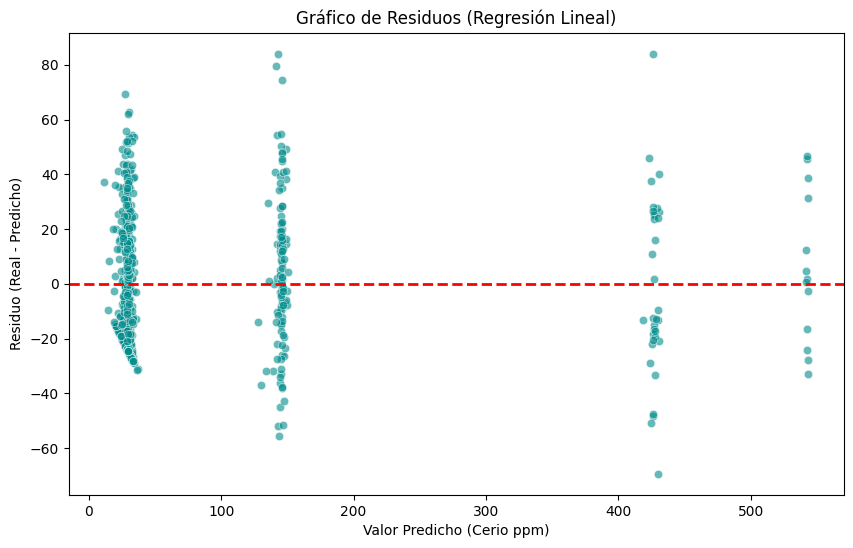


--- INTERPRETACIÓN ---
MAE (Error Absoluto Medio): 20.19 ppm. En promedio nos equivocamos en esta cantidad.
RMSE (Raíz Error Cuadrático): 24.41 ppm. Penaliza más los errores grandes.
R2 (Coef. Determinación): 0.9600. Explicamos el 96.0% de la varianza.


In [15]:
# =============================================================================
# LECCIÓN 6: MÉTRICAS DE DESEMPEÑO DETALLADAS
# =============================================================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Función auxiliar para calcular todas las métricas de un golpe
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Modelo': nombre_modelo,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# 1. EVALUAR MODELOS PREVIOS (Usamos las predicciones guardadas en Lección 4)
metricas_lineal = evaluar_modelo(y_test, y_pred_lin, "Regresión Lineal")
metricas_poly = evaluar_modelo(y_test, y_pred_poly, "Regresión Polinomial")

# 2. CREAR TABLA COMPARATIVA
df_metricas = pd.DataFrame([metricas_lineal, metricas_poly])

# Configurar índice y orden
df_metricas.set_index('Modelo', inplace=True)

print("--- TABLA COMPARATIVA DE MÉTRICAS (Lección 6) ---")
display(df_metricas.round(4))

# 3. INTERPRETACIÓN VISUAL (Residuos)
# Un buen modelo tiene residuos distribuidos aleatoriamente en torno a 0
residuos = y_test - y_pred_lin

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lin, y=residuos, alpha=0.6, color='darkcyan')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Residuos (Regresión Lineal)')
plt.xlabel('Valor Predicho (Cerio ppm)')
plt.ylabel('Residuo (Real - Predicho)')
plt.show()

print("\n--- INTERPRETACIÓN ---")
print(f"MAE (Error Absoluto Medio): {metricas_lineal['MAE']:.2f} ppm. En promedio nos equivocamos en esta cantidad.")
print(f"RMSE (Raíz Error Cuadrático): {metricas_lineal['RMSE']:.2f} ppm. Penaliza más los errores grandes.")
print(f"R2 (Coef. Determinación): {metricas_lineal['R2']:.4f}. Explicamos el {metricas_lineal['R2']*100:.1f}% de la varianza.")


In [18]:
# =============================================================================
# LECCIÓN 7: OPTIMIZACIÓN CON REGULARIZACIÓN (RIDGE & LASSO)
# =============================================================================
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# 1. DEFINIR HIPERPARÁMETROS A PROBAR
# 'alpha' controla la fuerza de la regularización (0 = Regresión Lineal normal)
# Probamos valores pequeños y grandes logarítmicamente
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

print("--- BÚSQUEDA DE HIPERPARÁMETROS (GRID SEARCH) ---")

# 2. OPTIMIZACIÓN RIDGE (L2)
# ------------------------------------------------------
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
rmse_ridge = -ridge_cv.best_score_
print(f"Mejor Ridge Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Mejor RMSE Ridge (CV): {rmse_ridge:.4f}")


# 3. OPTIMIZACIÓN LASSO (L1) - SELECCIÓN DE VARIABLES
# ------------------------------------------------------
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_root_mean_squared_error')
lasso_cv.fit(X_train, y_train)

best_lasso = lasso_cv.best_estimator_
rmse_lasso = -lasso_cv.best_score_
print(f"Mejor Lasso Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Mejor RMSE Lasso (CV): {rmse_lasso:.4f}")


# 4. ANÁLISIS DE IMPACTO EN COEFICIENTES (Feature Selection)
# ------------------------------------------------------
# Comparamos los coeficientes del modelo Lineal vs Lasso
# Lasso tiende a volver CERO los coeficientes inútiles
coef_comparacion = pd.DataFrame({
    'Variable': X_final.columns,
    'Lineal_Original': lin_reg.coef_,
    'Lasso_Optimizado': best_lasso.coef_
})

# Agregamos columna para ver si Lasso eliminó la variable (Coef ~ 0)
coef_comparacion['¿Eliminada por Lasso?'] = coef_comparacion['Lasso_Optimizado'].apply(lambda x: 'SÍ' if abs(x) < 0.1 else 'NO')

print("\n--- IMPACTO DE REGULARIZACIÓN LASSO (Selección de Variables) ---")
display(coef_comparacion.round(4))

# 5. EVALUACIÓN FINAL EN TEST SET
# ------------------------------------------------------
y_pred_lasso = best_lasso.predict(X_test)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_test_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- DESEMPEÑO FINAL EN TEST (Modelo Optimizado) ---")
print(f"RMSE Lasso: {rmse_test_lasso:.2f} ppm")
print(f"R2 Lasso: {r2_test_lasso:.4f}")

if rmse_test_lasso < 24.41: # Compara con tu valor anterior
    print(">> CONCLUSIÓN: La regularización mejoró levemente el modelo.")
else:
    print(">> CONCLUSIÓN: El modelo base ya era óptimo. La regularización solo simplificó coeficientes.")


--- BÚSQUEDA DE HIPERPARÁMETROS (GRID SEARCH) ---
Mejor Ridge Alpha: 0.001
Mejor RMSE Ridge (CV): 24.7289
Mejor Lasso Alpha: 0.01
Mejor RMSE Lasso (CV): 24.7277

--- IMPACTO DE REGULARIZACIÓN LASSO (Selección de Variables) ---


,Variable,Lineal_Original,Lasso_Optimizado,¿Eliminada por Lasso?
0,Profundidad_m,0.0507,0.0437,SÍ
1,Ley_Cu_pct,-2.8086,-2.8968,NO
2,Ley_Au_gpt,-0.6887,-0.5871,NO
3,Litologia_Brecha,4.7431,4.6234,NO
4,Litologia_Dique,397.2423,397.0901,NO
5,Litologia_Porfido,1.7907,1.6917,NO
6,Alteracion_Potasica,-114.3748,-114.2071,NO
7,Alteracion_Propilitica,-116.5790,-116.4012,NO
8,Alteracion_Silicificacion,-113.0381,-112.8257,NO



--- DESEMPEÑO FINAL EN TEST (Modelo Optimizado) ---
RMSE Lasso: 24.42 ppm
R2 Lasso: 0.9600
>> CONCLUSIÓN: El modelo base ya era óptimo. La regularización solo simplificó coeficientes.



--- RESULTADOS GRADIENT BOOSTING (Lección 8) ---
RMSE Boosting: 24.90 ppm
R2 Boosting: 0.9584

--- TABLA FINAL DEL PROYECTO ---


,Modelo,RMSE (ppm),R2 Score
0,Regresión Lineal,24.410971,0.960026
2,Lasso (Optimizado),24.419568,0.959998
1,Regresión Polinomial,24.569611,0.959505
3,Gradient Boosting,24.900683,0.958406


/tmp/ipykernel_2154/944421159.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia (%)', y='Variable', data=importancia, palette='viridis')


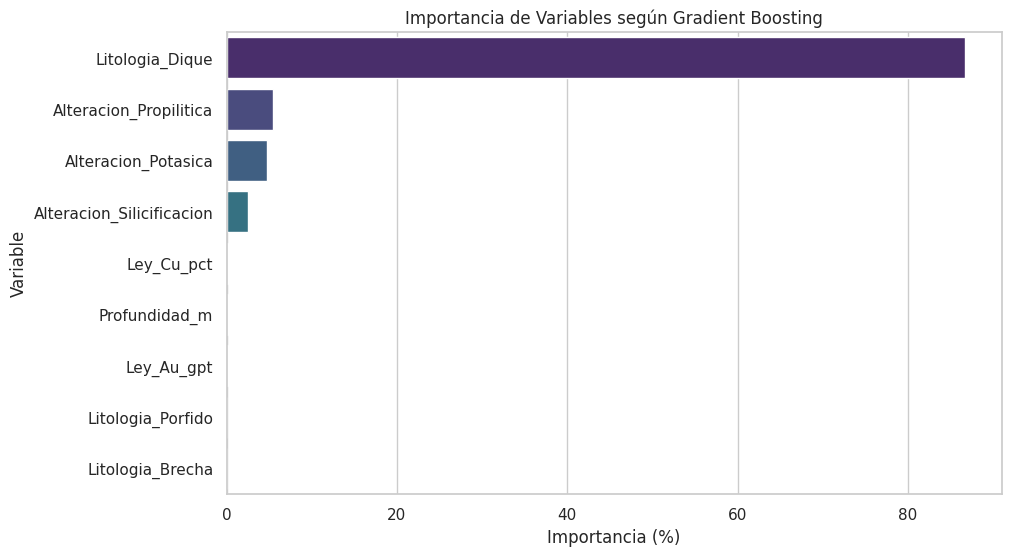


Modelo Lineal guardado como 'modelo_final_cerio.pkl' (Elegido por simplicidad y robustez).


In [19]:
# =============================================================================
# LECCIÓN 8: ALGORITMOS DE BOOSTING (GRADIENT BOOSTING)
# =============================================================================
from sklearn.ensemble import GradientBoostingRegressor

# 1. ENTRENAMIENTO DE GRADIENT BOOSTING
# -------------------------------------
# n_estimators=100: Crea 100 árboles secuenciales
# learning_rate=0.1: Cada árbol corrige un 10% del error residual
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_reg.predict(X_test)

# Métricas
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("\n--- RESULTADOS GRADIENT BOOSTING (Lección 8) ---")
print(f"RMSE Boosting: {rmse_gb:.2f} ppm")
print(f"R2 Boosting: {r2_gb:.4f}")


# 2. COMPARACIÓN FINAL DE TODOS LOS MODELOS
# -----------------------------------------
resultados_finales = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Regresión Polinomial', 'Lasso (Optimizado)', 'Gradient Boosting'],
    'RMSE (ppm)': [rmse_lin, rmse_poly, rmse_test_lasso, rmse_gb],
    'R2 Score': [r2_lin, r2_poly, r2_test_lasso, r2_gb]
})

print("\n--- TABLA FINAL DEL PROYECTO ---")
display(resultados_finales.sort_values(by='RMSE (ppm)'))


# 3. IMPORTANCIA DE VARIABLES (BOOSTING)
# --------------------------------------
# A diferencia de los coeficientes lineales (positivos/negativos),
# Boosting nos da "Feature Importance" (qué tanto se usó la variable para decidir)
importancia = pd.DataFrame({
    'Variable': X_final.columns,
    'Importancia (%)': gb_reg.feature_importances_ * 100
}).sort_values(by='Importancia (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (%)', y='Variable', data=importancia, palette='viridis')
plt.title('Importancia de Variables según Gradient Boosting')
plt.show()

# 4. EXPORTAR EL MEJOR MODELO (Opcional, para el "Entregable")
# ------------------------------------------------------------
import joblib
joblib.dump(lin_reg, 'modelo_final_cerio.pkl')
print("\nModelo Lineal guardado como 'modelo_final_cerio.pkl' (Elegido por simplicidad y robustez).")
